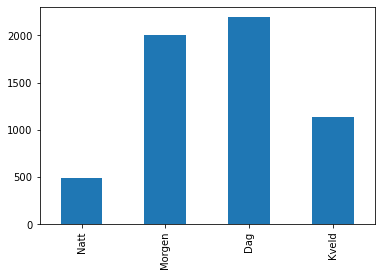

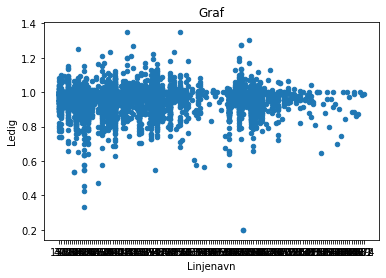

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Avgangstid_p,Avg_tid_omr,Ledig
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,2021-09-27 10:53:00,Morgen,0.955357
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,2021-09-27 13:12:00,Dag,0.955357
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,2021-09-27 10:19:00,Morgen,0.946429
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,2021-09-27 13:51:00,Dag,0.910714
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,2021-09-27 07:33:00,Morgen,0.910714


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=';')

#df['Dato'].value_counts().sort_index().plot.bar()
#plt.show()

df['Avgangstid_p'] = pd.to_datetime(df.Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra, errors='coerce')

a = df.assign(avg_tid = pd.cut(df.Avgangstid_p.dt.hour,[0,6,12,18,24],labels = ['Natt','Morgen','Dag','Kveld']))

df['Avg_tid_omr'] = a['avg_tid']

df['Avg_tid_omr'].value_counts().sort_index().plot.bar()
plt.show()

ledig = (df['Kjøretøy_Kapasitet'].values - df['Passasjerer_Ombord'].values)/df['Kjøretøy_Kapasitet'].values
df['Ledig'] = ledig

df.plot.scatter(x='Linjenavn', y='Ledig', title='Graf')
plt.show()

df.head()

#print(df)